In [1]:
# STEP 1: IMPORT DEPENDENCIES
#For basic calculations:
import pandas as pd
import numpy as np
import csv
from pathlib import Path
import hvplot.pandas

#For Heatmap:
import seaborn as sns
%matplotlib inline

In [2]:
# STEP 2: IMPORT DATA AS DATAFRAME
"""
Determnine if we are reading csv data, running individual api calls, or querying an in-house database
"""
#reading in csv data
df_2021 = pd.read_csv(
   Path('./Data_Folder/2021_5day_data.csv')
).set_index('Month')

In [3]:
# View the dataframe
df_2021

btc_start_date  price_close  volume_traded  \
Month                                                             
Jan    2020-12-29T00:00:00.0000000Z      32238.8   25472.782490   
Jan    2021-01-03T00:00:00.0000000Z      39489.0   67616.262880   
Jan    2021-01-08T00:00:00.0000000Z      34046.4   74167.006520   
Jan    2021-01-13T00:00:00.0000000Z      35816.4   54593.738760   
Jan    2021-01-18T00:00:00.0000000Z      33000.0   57642.595300   
Jan    2021-01-23T00:00:00.0000000Z      30424.2   40127.926010   
Jan    2021-01-28T00:00:00.0000000Z      33533.9   44920.479420   
Feb    2021-02-02T00:00:00.0000000Z      39257.0   34943.645750   
Feb    2021-02-07T00:00:00.0000000Z      47962.8   43803.195490   
Feb    2021-02-12T00:00:00.0000000Z      49218.7   23030.737270   
Feb    2021-02-17T00:00:00.0000000Z      57478.3   29059.495620   
Feb    2021-02-22T00:00:00.0000000Z      46314.5   55064.528860   
Feb    2021-02-27T00:00:00.0000000Z      50400.0   30561.305460   
March  2021-03-04T00:00:00.0000000Z      52375.0   27000.257890   
March  2021-03-09T00:00:00.0000000Z      61174.9   32303.020280   
March  2021-03-14T00:00:00.0000000Z      57640.9   28707.325930   
March  2021-03-19T00:00:00.0000000Z      54351.3   22276.612970   
March  2021-03-24T00:00:00.0000000Z      55782.0   26822.403450   
March  2021-03-29T00:00:00.0000000Z      59020.7   21927.513610   
April  2021-04-03T00:00:00.0000000Z      55928.5   16867.219050   
April  2021-04-08T00:00:00.0000000Z      59900.0   12511.387490   
April  2021-04-13T00:00:00.0000000Z      60085.2   23956.962290   
April  2021-04-18T00:00:00.0000000Z      51730.0   38729.682570   
April  2021-04-23T00:00:00.0000000Z      55078.7   25836.758560   
April  2021-04-28T00:00:00.0000000Z      56618.5   18063.820440   
May    2021-05-03T00:00:00.0000000Z      57383.0   23299.906450   
May    2021-05-08T00:00:00.0000000Z      49502.7   27416.687650   
May    2021-05-13T00:00:00.0000000Z      43551.8   43815.368990   
May    2021-05-18T00:00:00.0000000Z      37468.3   80626.457190   
May    2021-05-23T00:00:00.0000000Z      38516.4   49910.358930   
May    2021-05-28T00:00:00.0000000Z      36676.3   30806.964950   
June   2021-06-02T00:00:00.0000000Z      35789.0   25136.507820   
June   2021-06-07T00:00:00.0000000Z      37322.2   39000.996160   
June   2021-06-12T00:00:00.0000000Z      38337.1   34634.011520   
June   2021-06-17T00:00:00.0000000Z      31655.2   34720.738200   
June   2021-06-22T00:00:00.0000000Z      32277.0   38781.665140   
June   2021-06-27T00:00:00.0000000Z      33532.4   21609.552620   
July   2021-07-02T00:00:00.0000000Z      34235.0   14007.446100   
July   2021-07-07T00:00:00.0000000Z      34246.9   15594.711360   
July   2021-07-12T00:00:00.0000000Z      31405.9   15541.409350   
July   2021-07-17T00:00:00.0000000Z      32125.0   17902.804200   
July   2021-07-22T00:00:00.0000000Z      37274.9   19130.405450   
July   2021-07-27T00:00:00.0000000Z      41488.5   23526.686240   
Aug    2021-08-01T00:00:00.0000000Z      40886.4   17907.209880   
Aug    2021-08-06T00:00:00.0000000Z      45595.1   22220.685710   
Aug    2021-08-11T00:00:00.0000000Z      47019.3   15962.343210   
Aug    2021-08-16T00:00:00.0000000Z      44588.5    9051.411811   

                     eth_start_date  price_close.1  volume_traded.1  \
Month                                                                 
Jan    2020-12-29T00:00:00.0000000Z         775.01     1.935678e+05   
Jan    2021-01-03T00:00:00.0000000Z        1226.18     1.411777e+06   
Jan    2021-01-08T00:00:00.0000000Z        1049.98     1.229539e+06   
Jan    2021-01-13T00:00:00.0000000Z        1233.24     7.871186e+05   
Jan    2021-01-18T00:00:00.0000000Z        1234.03     1.013890e+06   
Jan    2021-01-23T00:00:00.0000000Z        1240.68     8.308926e+05   
Jan    2021-01-28T00:00:00.0000000Z        1374.05     5.248399e+05   
Feb    2021-02-02T00:00:00.0000000Z        1678.92     7.730877e+05   
Feb    2021-02-07T00:00:00.

In [4]:
# Clean the dataframe to only include the closing price
final_2021_df = pd.DataFrame()
final_2021_df['BTC_Daily_Close'] = df_2021['price_close']
final_2021_df['ETH_Daily_Close'] = df_2021['price_close.1']
final_2021_df['LTC_Daily_Close'] = df_2021['price_close.2']
final_2021_df['ADA_Daily_Close'] = df_2021['price_close.3']
final_2021_df['DOGE_Daily_Close'] = df_2021['price_close.4']
final_2021_df['XLM_Daily_Close'] = df_2021['price_close.5']
final_2021_df['XRP_Daily_Close'] = df_2021['price_close.6']
final_2021_df['LISK_Daily_Close'] = df_2021['price_close.7']
final_2021_df['WAVES_Daily_Close'] = df_2021['price_close.8']
final_2021_df['ZEC_Daily_Close'] = df_2021['price_close.9']
final_2021_df['SC_Daily_Close'] = df_2021['price_close.10']
final_2021_df['USDT_Daily_Close'] = df_2021['price_close.11']
final_2021_df['DASH_Daily_Close'] = df_2021['price_close.12']
final_2021_df['LINK_Daily_Close'] = df_2021['price_close.13']

final_2021_df

BTC_Daily_Close  ETH_Daily_Close  LTC_Daily_Close  ADA_Daily_Close  \
Month                                                                       
Jan            32238.8           775.01           136.92         0.177523   
Jan            39489.0          1226.18           169.79         0.299293   
Jan            34046.4          1049.98           133.35         0.288926   
Jan            35816.4          1233.24           142.71         0.381833   
Jan            33000.0          1234.03           138.41         0.349574   
Jan            30424.2          1240.68           122.74         0.312500   
Jan            33533.9          1374.05           131.98         0.408881   
Feb            39257.0          1678.92           155.75         0.635000   
Feb            47962.8          1786.31           183.98         0.929935   
Feb            49218.7          1781.69           209.86         0.871539   
Feb            57478.3          1935.44           227.53         1.100840   
Feb            46314.5          1445.33           170.41         1.242939   
Feb            50400.0          1571.83           187.96         1.215688   
March          52375.0          1833.68           191.76         1.118559   
March          61174.9          1920.17           225.95         1.100964   
March          57640.9          1776.57           199.83         1.230974   
March          54351.3          1668.40           186.12         1.115531   
March          55782.0          1685.98           184.06         1.189723   
March          59020.7          2134.29           211.66         1.191360   
April          55928.5          1961.94           219.35         1.173699   
April          59900.0          2137.61           244.57         1.322482   
April          60085.2          2318.27           301.47         1.372031   
April          51730.0          2401.22           252.90         1.145205   
April          55078.7          2669.15           260.12         1.308989   
April          56618.5          2951.66           269.03         1.327791   
May            57383.0          3482.94           345.32         1.655011   
May            49502.7          3858.37           306.51         1.565000   
May            43551.8          3285.06           281.90         2.031234   
May            37468.3          2297.09           169.26         1.463598   
May            38516.4          2742.84           194.22         1.655785   
May            36676.3          2634.34           182.92         1.734232   
June           35789.0          2712.03           176.37         1.677341   
June           37322.2          2356.79           162.72         1.437164   
June           38337.1          2367.47           166.52         1.483493   
June           31655.2          1886.83           124.69         1.174492   
June           32277.0          1830.01           126.72         1.251661   
June           33532.4          2109.25           137.43         1.336065   
July           34235.0          2322.37           139.03         1.417065   
July           34246.9          2140.08           134.20         1.348367   
July           31405.9          1875.39           120.66         1.172784   
July           32125.0          1995.00           117.56         1.169397   
July           37274.9          2229.46           131.45         1.255386   
July           41488.5          2530.53           144.43         1.318233   
Aug            40886.4          2828.88           143.52         1.386727   
Aug            45595.1          3141.69           165.44         1.678163   
Aug            47019.3          3311.34           184.95         2.170323   
Aug            44588.5          3004.93           164.86         2.063826   

       DOGE_Daily_Close  XLM_Daily_Close  XRP_Daily_Close  LISK_Daily_Close  \
Month                                                                         
Jan            0.010578         0.127517          0.22108          1.143472

In [5]:
btc_2021_df = final_2021_df['BTC_Daily_Close'].pct_change().fillna(0)
btc_2021_df

Month
Jan      0.000000
Jan      0.224891
Jan     -0.137826
Jan      0.051988
Jan     -0.078634
Jan     -0.078055
Jan      0.102211
Feb      0.170666
Feb      0.221764
Feb      0.026185
Feb      0.167814
Feb     -0.194226
Feb      0.088212
March    0.039187
March    0.168017
March   -0.057769
March   -0.057071
March    0.026323
March    0.058060
April   -0.052392
April    0.071010
April    0.003092
April   -0.139056
April    0.064734
April    0.027956
May      0.013503
May     -0.137328
May     -0.120214
May     -0.139684
May      0.027973
May     -0.047774
June    -0.024193
June     0.042840
June     0.027193
June    -0.174293
June     0.019643
June     0.038895
July     0.020953
July     0.000348
July    -0.082956
July     0.022897
July     0.160308
July     0.113041
Aug     -0.014512
Aug      0.115165
Aug      0.031236
Aug     -0.051698
Name: BTC_Daily_Close, dtype: float64

In [6]:
eth_2021_df = final_2021_df['ETH_Daily_Close'].pct_change().fillna(0)
eth_2021_df

Month
Jan      0.000000
Jan      0.582147
Jan     -0.143698
Jan      0.174537
Jan      0.000641
Jan      0.005389
Jan      0.107498
Feb      0.221877
Feb      0.063964
Feb     -0.002586
Feb      0.086294
Feb     -0.253229
Feb      0.087523
March    0.166589
March    0.047167
March   -0.074785
March   -0.060887
March    0.010537
March    0.265905
April   -0.080753
April    0.089539
April    0.084515
April    0.035781
April    0.111581
April    0.105843
May      0.179994
May      0.107791
May     -0.148589
May     -0.300746
May      0.194050
May     -0.039558
June     0.029491
June    -0.130987
June     0.004532
June    -0.203018
June    -0.030114
June     0.152589
July     0.101041
July    -0.078493
July    -0.123682
July     0.063779
July     0.117524
July     0.135042
Aug      0.117900
Aug      0.110577
Aug      0.054000
Aug     -0.092534
Name: ETH_Daily_Close, dtype: float64

In [7]:
ltc_2021_df = final_2021_df['LTC_Daily_Close'].pct_change().fillna(0)
ltc_2021_df

Month
Jan      0.000000
Jan      0.240067
Jan     -0.214618
Jan      0.070191
Jan     -0.030131
Jan     -0.113214
Jan      0.075281
Feb      0.180103
Feb      0.181252
Feb      0.140667
Feb      0.084199
Feb     -0.251044
Feb      0.102987
March    0.020217
March    0.178296
March   -0.115601
March   -0.068608
March   -0.011068
March    0.149951
April    0.036332
April    0.114976
April    0.232653
April   -0.161111
April    0.028549
April    0.034253
May      0.283574
May     -0.112389
May     -0.080291
May     -0.399574
May      0.147465
May     -0.058181
June    -0.035808
June    -0.077394
June     0.023353
June    -0.251201
June     0.016280
June     0.084517
July     0.011642
July    -0.034741
July    -0.100894
July    -0.025692
July     0.118152
July     0.098745
Aug     -0.006301
Aug      0.152731
Aug      0.117928
Aug     -0.108624
Name: LTC_Daily_Close, dtype: float64

In [8]:
ada_2021_df = final_2021_df['ADA_Daily_Close'].pct_change().fillna(0)
ada_2021_df

Month
Jan      0.000000
Jan      0.685939
Jan     -0.034638
Jan      0.321560
Jan     -0.084485
Jan     -0.106055
Jan      0.308419
Feb      0.553019
Feb      0.464465
Feb     -0.062796
Feb      0.263099
Feb      0.129082
Feb     -0.021925
March   -0.079896
March   -0.015730
March    0.118087
March   -0.093782
March    0.066508
March    0.001376
April   -0.014824
April    0.126764
April    0.037467
April   -0.165321
April    0.143017
April    0.014364
May      0.246439
May     -0.054387
May      0.297913
May     -0.279454
May      0.131311
May      0.047378
June    -0.032805
June    -0.143189
June     0.032236
June    -0.208293
June     0.065704
June     0.067434
July     0.060626
July    -0.048479
July    -0.130219
July    -0.002888
July     0.073533
July     0.050062
Aug      0.051959
Aug      0.210161
Aug      0.293273
Aug     -0.049070
Name: ADA_Daily_Close, dtype: float64

In [9]:
xlm_2021_df = final_2021_df['XLM_Daily_Close'].pct_change().fillna(0)
xlm_2021_df

Month
Jan      0.000000
Jan      1.455390
Jan     -0.106233
Jan      0.084541
Jan     -0.110544
Jan     -0.114140
Jan      0.350735
Feb      0.170235
Feb      0.207302
Feb      0.063820
Feb      0.022260
Feb     -0.193634
Feb      0.052992
March   -0.007105
March   -0.025157
March   -0.032343
March    0.001297
March    0.003252
March    0.108526
April    0.078801
April    0.243513
April    0.004796
April   -0.239602
April    0.132086
April    0.090496
May      0.135679
May     -0.065375
May      0.089374
May     -0.394455
May      0.078833
May     -0.004523
June    -0.090363
June    -0.164111
June    -0.002227
June    -0.254198
June     0.053194
June     0.082031
July    -0.035330
July    -0.056338
July    -0.041915
July    -0.031533
July     0.144529
July     0.091125
Aug     -0.014238
Aug      0.105713
Aug      0.262333
Aug     -0.139933
Name: XLM_Daily_Close, dtype: float64

In [10]:
xrp_2021_df = final_2021_df['XRP_Daily_Close'].pct_change().fillna(0)
xrp_2021_df

Month
Jan      0.000000
Jan      0.465849
Jan     -0.097386
Jan     -0.051930
Jan     -0.016227
Jan     -0.079870
Jan      0.478509
Feb      0.196605
Feb      0.191502
Feb     -0.017612
Feb      0.048668
Feb     -0.214510
Feb      0.049368
March    0.055769
March   -0.034590
March    0.023974
March    0.171969
March   -0.003602
March    0.107441
April    0.507708
April    0.605615
April    0.050348
April   -0.250430
April    0.213942
April    0.113468
May      0.011911
May     -0.206224
May      0.191578
May     -0.394509
May      0.072184
May      0.041140
June    -0.064060
June    -0.107841
June    -0.014348
June    -0.268858
June     0.012857
June     0.071926
July     0.007541
July    -0.045616
July    -0.069875
July    -0.035657
July     0.098357
July     0.193197
Aug     -0.017724
Aug      0.162777
Aug      0.508211
Aug     -0.136354
Name: XRP_Daily_Close, dtype: float64

In [11]:
lisk_2021_df = final_2021_df['LISK_Daily_Close'].pct_change().fillna(0)
lisk_2021_df

Month
Jan      0.000000
Jan      0.180201
Jan     -0.081377
Jan      0.133542
Jan     -0.039448
Jan     -0.085946
Jan      0.127227
Feb      0.172033
Feb      0.498060
Feb      0.321857
Feb      0.202008
Feb     -0.224176
Feb      0.077583
March    0.011956
March    0.010057
March    0.128049
March    0.331767
March   -0.027109
March    0.236688
April    0.038806
April    0.039311
April    0.004471
April   -0.326092
April    0.108929
April    0.171870
May      0.600703
May     -0.233285
May     -0.167939
May     -0.310169
May      0.052391
May     -0.140085
June    -0.033973
June    -0.193905
June     0.011681
June    -0.314376
June    -0.009120
June     0.305359
July     0.047603
July    -0.027508
July    -0.136370
July     0.025911
July     0.122071
July     0.255189
Aug      0.096441
Aug      0.108723
Aug      0.127147
Aug     -0.023935
Name: LISK_Daily_Close, dtype: float64

In [12]:
waves_2021_df = final_2021_df['WAVES_Daily_Close'].pct_change().fillna(0)
waves_2021_df

Month
Jan      0.000000
Jan      0.062317
Jan      0.009485
Jan      0.228775
Jan     -0.128288
Jan     -0.059026
Jan      0.157606
Feb      0.165905
Feb      0.285219
Feb      0.053239
Feb      0.116983
Feb     -0.227776
Feb      0.039334
March    0.023666
March    0.003529
March    0.015434
March    0.086473
March    0.048691
March    0.106540
April   -0.070230
April    0.251578
April    0.028956
April   -0.184252
April    0.624680
April    0.148366
May      0.370771
May     -0.032756
May     -0.140468
May     -0.339107
May     -0.079166
May     -0.198805
June     0.236193
June    -0.142005
June     0.210020
June    -0.176254
June    -0.029339
June     0.172795
July     0.016447
July    -0.118810
July    -0.056430
July    -0.051989
July     0.178856
July     0.105593
Aug     -0.009654
Aug      0.065527
Aug      0.428143
Aug     -0.072682
Name: WAVES_Daily_Close, dtype: float64

In [13]:
zec_2021_df = final_2021_df['ZEC_Daily_Close'].pct_change().fillna(0)
zec_2021_df

Month
Jan      0.000000
Jan      0.465849
Jan     -0.097386
Jan     -0.051930
Jan     -0.016227
Jan     -0.079870
Jan      0.478509
Feb      0.196605
Feb      0.191502
Feb     -0.017612
Feb      0.048668
Feb     -0.214510
Feb      0.049368
March    0.055769
March   -0.034590
March    0.023974
March    0.171969
March   -0.003602
March    0.107441
April    0.507708
April    0.605615
April    0.050348
April   -0.250430
April    0.213942
April    0.113468
May      0.011911
May     -0.206224
May      0.191578
May     -0.394509
May      0.072184
May      0.041140
June    -0.064060
June    -0.107841
June    -0.014348
June    -0.268858
June     0.012857
June     0.071926
July     0.007541
July    -0.045616
July    -0.069875
July    -0.035657
July     0.098357
July     0.193197
Aug     -0.017724
Aug      0.162777
Aug      0.508211
Aug     -0.136354
Name: ZEC_Daily_Close, dtype: float64

In [14]:
sc_2021_df = final_2021_df['SC_Daily_Close'].pct_change().fillna(0)
sc_2021_df

Month
Jan      0.000000
Jan      0.062317
Jan      0.009485
Jan      0.228775
Jan     -0.128288
Jan     -0.059026
Jan      0.157606
Feb      0.165905
Feb      0.285219
Feb      0.053239
Feb      0.116983
Feb     -0.227776
Feb      0.039334
March    0.023666
March    0.003529
March    0.015434
March    0.086473
March    0.048691
March    0.106540
April   -0.070230
April    0.251578
April    0.028956
April   -0.184252
April    0.624680
April    0.148366
May      0.370771
May     -0.032756
May     -0.140468
May     -0.339107
May     -0.079166
May     -0.198805
June     0.236193
June    -0.142005
June     0.210020
June    -0.176254
June    -0.029339
June     0.172795
July     0.016447
July    -0.118810
July    -0.056430
July    -0.051989
July     0.178856
July     0.105593
Aug     -0.009654
Aug      0.065527
Aug      0.428143
Aug     -0.072682
Name: SC_Daily_Close, dtype: float64

In [15]:
usdt_2021_df = final_2021_df['USDT_Daily_Close'].pct_change().fillna(0)
usdt_2021_df

Month
Jan      0.000000
Jan      0.000300
Jan     -0.001398
Jan     -0.000100
Jan      0.001000
Jan      0.001099
Jan     -0.001497
Feb      0.001200
Feb     -0.001098
Feb     -0.000200
Feb      0.001000
Feb     -0.001099
Feb      0.000200
March    0.000200
March   -0.000900
March    0.000300
March    0.000100
March   -0.000300
March    0.000400
April   -0.000300
April   -0.000200
April    0.001401
April   -0.000799
April    0.000900
April   -0.000400
May      0.000200
May     -0.001199
May      0.000800
May      0.000300
May      0.000200
May     -0.001199
June     0.000500
June    -0.000300
June    -0.000200
June     0.000000
June     0.000200
June     0.000200
July    -0.000200
July    -0.000100
July     0.000400
July    -0.000300
July     0.000300
July     0.000400
Aug     -0.000300
Aug     -0.000100
Aug      0.000500
Aug     -0.000600
Name: USDT_Daily_Close, dtype: float64

In [16]:
dash_2021_df = final_2021_df['DASH_Daily_Close'].pct_change().fillna(0)
dash_2021_df

Month
Jan      0.000000
Jan      0.139705
Jan      0.297097
Jan     -0.036975
Jan     -0.150790
Jan     -0.078281
Jan      0.067987
Feb      0.146324
Feb      0.390747
Feb      0.512643
Feb      0.210785
Feb     -0.316362
Feb      0.077193
March   -0.016514
March    0.112879
March   -0.070658
March   -0.080247
March   -0.002547
March    0.175347
April    0.038918
April    0.105022
April    0.274731
April   -0.225106
April    0.060310
April    0.075078
May      0.284823
May     -0.122959
May     -0.171016
May     -0.395267
May      0.151422
May     -0.066437
June    -0.031543
June    -0.107606
June    -0.007729
June    -0.246555
June     0.005334
June     0.119404
July    -0.029561
July    -0.050392
July    -0.104800
July     0.208142
July     0.029221
July     0.146422
Aug      0.007695
Aug      0.064915
Aug      0.229149
Aug     -0.048219
Name: DASH_Daily_Close, dtype: float64

In [17]:
doge_2021_df = final_2021_df['DOGE_Daily_Close'].pct_change().fillna(0)
doge_2021_df

Month
Jan      0.000000
Jan     -0.076577
Jan     -0.174966
Jan      0.126536
Jan     -0.067799
Jan     -0.119133
Jan      3.670405
Feb      0.658192
Feb      0.207218
Feb     -0.232679
Feb      0.048528
Feb     -0.098480
Feb     -0.000593
March    0.250022
March   -0.007444
March   -0.085699
March   -0.068087
March    0.004855
March    0.074326
April    0.018182
April    0.210944
April    2.972686
April   -0.075412
April    0.043704
April    0.369956
May      0.848131
May     -0.432307
May      0.246114
May     -0.299313
May     -0.024729
May      0.110028
June     0.002190
June    -0.140453
June    -0.035495
June    -0.420187
June     0.377827
June    -0.005286
July    -0.041643
July    -0.078466
July    -0.202789
July     0.106277
July     0.069970
July     0.019152
Aug     -0.031900
Aug      0.280439
Aug      0.322951
Aug     -0.126021
Name: DOGE_Daily_Close, dtype: float64

In [18]:
link_2021_df = final_2021_df['LINK_Daily_Close'].pct_change().fillna(0)
link_2021_df

Month
Jan      0.000000
Jan      0.310638
Jan     -0.123125
Jan      0.660557
Jan     -0.073225
Jan     -0.026937
Jan      0.089844
Feb      0.092924
Feb      0.114611
Feb      0.146653
Feb      0.068205
Feb     -0.263668
Feb      0.190385
March    0.062724
March   -0.065408
March   -0.010127
March   -0.089961
March   -0.005185
March    0.218257
April   -0.042069
April    0.065522
April    0.206711
April   -0.120500
April    0.045749
April    0.073955
May      0.244265
May     -0.154618
May     -0.103763
May     -0.375913
May      0.363497
May     -0.031065
June    -0.103947
June    -0.219036
June     0.071222
June    -0.242451
June    -0.027995
June     0.076323
July     0.100596
July    -0.085479
July    -0.168822
July     0.001142
July     0.185901
July     0.252916
Aug      0.059809
Aug      0.020744
Aug      0.135848
Aug     -0.096979
Name: LINK_Daily_Close, dtype: float64

In [19]:
# Making Daily Returns dataframe for calcs
daily_2021_returns = pd.DataFrame()

# calculating Daily returns on dataframe


daily_2021_returns['BTC'] = btc_2021_df
daily_2021_returns['ETH']= eth_2021_df
daily_2021_returns['LTC'] = ltc_2021_df
daily_2021_returns['ADA'] = ada_2021_df
daily_2021_returns['DOGE'] = doge_2021_df
daily_2021_returns['XLM'] = xlm_2021_df
daily_2021_returns['XRP'] = xrp_2021_df
daily_2021_returns['LISK'] = lisk_2021_df
daily_2021_returns['ZEC'] = zec_2021_df
daily_2021_returns['SC'] = sc_2021_df
daily_2021_returns['USDT'] = usdt_2021_df
daily_2021_returns['DASH'] = dash_2021_df
daily_2021_returns['WAVES'] = waves_2021_df
daily_2021_returns['LINK'] = link_2021_df

daily_2021_returns

BTC       ETH       LTC       ADA      DOGE       XLM       XRP  \
Month                                                                         
Jan    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jan    0.224891  0.582147  0.240067  0.685939 -0.076577  1.455390  0.465849   
Jan   -0.137826 -0.143698 -0.214618 -0.034638 -0.174966 -0.106233 -0.097386   
Jan    0.051988  0.174537  0.070191  0.321560  0.126536  0.084541 -0.051930   
Jan   -0.078634  0.000641 -0.030131 -0.084485 -0.067799 -0.110544 -0.016227   
Jan   -0.078055  0.005389 -0.113214 -0.106055 -0.119133 -0.114140 -0.079870   
Jan    0.102211  0.107498  0.075281  0.308419  3.670405  0.350735  0.478509   
Feb    0.170666  0.221877  0.180103  0.553019  0.658192  0.170235  0.196605   
Feb    0.221764  0.063964  0.181252  0.464465  0.207218  0.207302  0.191502   
Feb    0.026185 -0.002586  0.140667 -0.062796 -0.232679  0.063820 -0.017612   
Feb    0.167814  0.086294  0.084199  0.263099  0.048528  0.022260  0.048668   
Feb   -0.194226 -0.253229 -0.251044  0.129082 -0.098480 -0.193634 -0.214510   
Feb    0.088212  0.087523  0.102987 -0.021925 -0.000593  0.052992  0.049368   
March  0.039187  0.166589  0.020217 -0.079896  0.250022 -0.007105  0.055769   
March  0.168017  0.047167  0.178296 -0.015730 -0.007444 -0.025157 -0.034590   
March -0.057769 -0.074785 -0.115601  0.118087 -0.085699 -0.032343  0.023974   
March -0.057071 -0.060887 -0.068608 -0.093782 -0.068087  0.001297  0.171969   
March  0.026323  0.010537 -0.011068  0.066508  0.004855  0.003252 -0.003602   
March  0.058060  0.265905  0.149951  0.001376  0.074326  0.108526  0.107441   
April -0.052392 -0.080753  0.036332 -0.014824  0.018182  0.078801  0.507708   
April  0.071010  0.089539  0.114976  0.126764  0.210944  0.243513  0.605615   
April  0.003092  0.084515  0.232653  0.037467  2.972686  0.004796  0.050348   
April -0.139056  0.035781 -0.161111 -0.165321 -0.075412 -0.239602 -0.250430   
April  0.064734  0.111581  0.028549  0.143017  0.043704  0.132086  0.213942   
April  0.027956  0.105843  0.034253  0.014364  0.369956  0.090496  0.113468   
May    0.013503  0.179994  0.283574  0.246439  0.848131  0.135679  0.011911   
May   -0.137328  0.107791 -0.112389 -0.054387 -0.432307 -0.065375 -0.206224   
May   -0.120214 -0.148589 -0.080291  0.297913  0.246114  0.089374  0.191578   
May   -0.139684 -0.300746 -0.399574 -0.279454 -0.299313 -0.394455 -0.394509   
May    0.027973  0.194050  0.147465  0.131311 -0.024729  0.078833  0.072184   
May   -0.047774 -0.039558 -0.058181  0.047378  0.110028 -0.004523  0.041140   
June  -0.024193  0.029491 -0.035808 -0.032805  0.002190 -0.090363 -0.064060   
June   0.042840 -0.130987 -0.077394 -0.143189 -0.140453 -0.164111 -0.107841   
June   0.027193  0.004532  0.023353  0.032236 -0.035495 -0.002227 -0.014348   
June  -0.174293 -0.203018 -0.251201 -0.208293 -0.420187 -0.254198 -0.268858   
June   0.019643 -0.030114  0.016280  0.065704  0.377827  0.053194  0.012857   
June   0.038895  0.152589  0.084517  0.067434 -0.005286  0.082031  0.071926   
July   0.020953  0.101041  0.011642  0.060626 -0.041643 -0.035330  0.007541   
July   0.000348 -0.078493 -0.034741 -0.048479 -0.078466 -0.056338 -0.045616   
July  -0.082956 -0.123682 -0.100894 -0.130219 -0.202789 -0.041915 -0.069875   
July   0.022897  0.063779 -0.025692 -0.002888  0.106277 -0.031533 -0.035657   
July   0.160308  0.117524  0.118152  0.073533  0.069970  0.144529  0.098357   
July   0.113041  0.135042  0.098745  0.050062  0.019152  0.091125  0.193197   
Aug   -0.014512  0.117900 -0.006301  0.051959 -0.031900 -0.014238 -0.017724   
Aug    0.115165  0.110577  0.152731  0.210161  0.280439  0.105713  0.162777   
Aug    0.031236  0.054000  0.117928  0.293273  0.322951  0.262333  0.508211   
Aug   -0.051698 -0.092534 -0.108624 -0.049070 -0.126021 -0.139933 -0.136354   

           LISK       ZEC        SC      USDT      DASH     WAVES      LINK  
Month                                                         

In [20]:
# Calculating Market variance, using bitcoin as proxy
market_var = btc_2021_df.var()
market_var

0.010184799449571787

In [21]:
eth_var = eth_2021_df.var()
eth_var

0.021793330370613657

In [22]:
ltc_var = ltc_2021_df.var()
ltc_var

0.019595260020102513

In [23]:
ada_var = ada_2021_df.var()
ada_var

0.03627528981726254

In [24]:
xlm_var = xlm_2021_df.var()
xlm_var

0.06342344726150234

In [25]:
xrp_var = xrp_2021_df.var()
xrp_var

0.042271411818980045

In [26]:
lisk_var = lisk_2021_df.var()
lisk_var

0.03755402343146485

In [27]:
waves_var = waves_2021_df.var()
waves_var

0.032140731590969855

In [28]:
zec_var = zec_2021_df.var()
zec_var

0.042271411818980045

In [29]:
sc_var = sc_2021_df.var()
sc_var

0.032140731590969855

In [30]:
usdt_var = usdt_2021_df.var()
usdt_var

4.7240845601959287e-07

In [31]:
dash_var = dash_2021_df.var()
dash_var

0.030793778833127804

In [32]:
doge_var = doge_2021_df.var()
doge_var

0.5095289271282648

In [33]:
link_var = link_2021_df.var()
link_var

0.03221032053365475

In [34]:
# Market Covariance, using bitcoin as proxy
mkt_2021_cov = btc_2021_df.cov(btc_2021_df)
mkt_2021_cov

0.010184799449571787

In [35]:
eth_2021_cov = eth_2021_df.cov(btc_2021_df)
eth_2021_cov

0.010444681748061794

In [36]:
ltc_2021_cov = ltc_2021_df.cov(btc_2021_df)
ltc_2021_cov

0.011500564941868484

In [37]:
ada_2021_cov = ada_2021_df.cov(btc_2021_df)
ada_2021_cov

0.011947097623514634

In [38]:
xlm_2021_cov = xlm_2021_df.cov(btc_2021_df)
xlm_2021_cov

0.015752540888186096

In [39]:
xrp_2021_cov = xrp_2021_df.cov(btc_2021_df)
xrp_2021_cov

0.011371553703995509

In [40]:
lisk_2021_cov = lisk_2021_df.cov(btc_2021_df)
lisk_2021_cov

0.012691738032640546

In [41]:
waves_2021_cov = waves_2021_df.cov(btc_2021_df)
waves_2021_cov

0.010141541633649994

In [42]:
zec_2021_cov = zec_2021_df.cov(btc_2021_df)
zec_2021_cov

0.011371553703995509

In [43]:
sc_2021_cov = sc_2021_df.cov(btc_2021_df)
sc_2021_cov

0.010141541633649994

In [44]:
usdt_2021_cov = usdt_2021_df.cov(btc_2021_df)
usdt_2021_cov

1.0332687605480643e-05

In [45]:
dash_2021_cov = dash_2021_df.cov(btc_2021_df)
dash_2021_cov

0.010930131083249535

In [46]:
doge_2021_cov = doge_2021_df.cov(btc_2021_df)
doge_2021_cov

0.017079088948291184

In [47]:
link_2021_cov = link_2021_df.cov(btc_2021_df)
link_2021_cov

0.011108686163054254

In [48]:
# Beta calculations
btc_beta_2021 = mkt_2021_cov / market_var
btc_beta_2021

1.0

In [49]:
eth_beta_2021 = eth_2021_cov / market_var
eth_beta_2021

1.0255166829525477

In [50]:
ltc_beta_2021 = ltc_2021_cov / market_var
ltc_beta_2021

1.1291891410146537

In [51]:
ada_beta_2021 = ada_2021_cov / market_var
ada_beta_2021

1.1730321920101177

In [52]:
xlm_beta_2021 = xlm_2021_cov / market_var
xlm_beta_2021

1.5466716812816967

In [53]:
xrp_beta_2021 = xrp_2021_cov / market_var
xrp_beta_2021

1.1165221033855133

In [54]:
lisk_beta_2021 = lisk_2021_cov / market_var
lisk_beta_2021

1.2461451102185581

In [55]:
waves_beta_2021 = waves_2021_cov / market_var
waves_beta_2021

0.9957527081278353

In [56]:
zec_beta_2021 = zec_2021_cov / market_var
zec_beta_2021

1.1165221033855133

In [57]:
sc_beta_2021 = sc_2021_cov / market_var
sc_beta_2021

0.9957527081278353

In [58]:
usdt_beta_2021 = usdt_2021_cov / market_var
usdt_beta_2021

0.0010145204779574795

In [59]:
dash_beta_2021 = dash_2021_cov / market_var
dash_beta_2021

1.0731807864620333

In [60]:
doge_beta_2021 = doge_2021_cov / market_var
doge_beta_2021

1.6769195145034754

In [61]:
link_beta_2021 = link_2021_cov / market_var
link_beta_2021

1.0907123128007503

In [62]:
# making list for convenience
Beta_list = [btc_beta_2021, eth_beta_2021, ltc_beta_2021, ada_beta_2021, doge_beta_2021, xlm_beta_2021, xrp_beta_2021, lisk_beta_2021, zec_beta_2021, sc_beta_2021, usdt_beta_2021, dash_beta_2021, waves_beta_2021, link_beta_2021]

Beta_list

[1.0,
 1.0255166829525477,
 1.1291891410146537,
 1.1730321920101177,
 1.6769195145034754,
 1.5466716812816967,
 1.1165221033855133,
 1.2461451102185581,
 1.1165221033855133,
 0.9957527081278353,
 0.0010145204779574795,
 1.0731807864620333,
 0.9957527081278353,
 1.0907123128007503]

<AxesSubplot:>

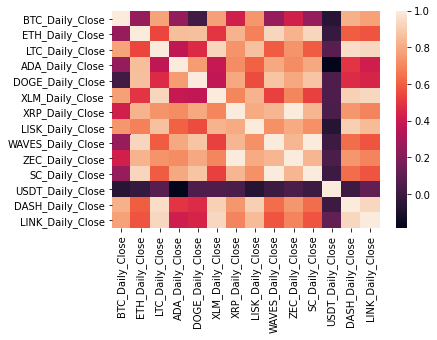

In [63]:
# Visualizations and Plots
correlation = final_2021_df.corr()
sns.heatmap(correlation)

In [64]:
correlation.hvplot.heatmap()

:HeatMap   [columns,index]   (value)

In [65]:
daily_2021_returns.hvplot.box(title = "2021: Spread of Daily Returns", figsize = (30, 10), rot = 45,  box_fill_color = 'cyan', outlier_color = 'red')

:BoxWhisker   [Variable]   (value)

In [66]:
# lazy way of compiling summary data
summary_data = pd.DataFrame()
summary_data = daily_2021_returns.describe()

# basically all this is just to flip charts to make input of the beta series more convenient
summary_data = summary_data.T
summary_data['beta'] = Beta_list
summary_data = summary_data.T
summary_data

BTC        ETH        LTC        ADA       DOGE        XLM  \
count  47.000000  47.000000  47.000000  47.000000  47.000000  47.000000   
mean    0.011881   0.039404   0.014210   0.068786   0.174323   0.042331   
std     0.100920   0.147626   0.139983   0.190461   0.713813   0.251840   
min    -0.194226  -0.300746  -0.399574  -0.279454  -0.432307  -0.394455   
25%    -0.054731  -0.050222  -0.073001  -0.048774  -0.077522  -0.049126   
50%     0.022897   0.054000   0.020217   0.037467   0.000000   0.003252   
75%     0.061397   0.111079   0.116452   0.130197   0.166877   0.090810   
max     0.224891   0.582147   0.283574   0.685939   3.670405   1.455390   
beta    1.000000   1.025517   1.129189   1.173032   1.676920   1.546672   

             XRP       LISK        ZEC         SC       USDT       DASH  \
count  47.000000  47.000000  47.000000  47.000000  47.000000  47.000000   
mean    0.053727   0.046230   0.053727   0.045193  -0.000015   0.033441   
std     0.205600   0.193789   0.205600   0.179278   0.000687   0.175482   
min    -0.394509  -0.326092  -0.394509  -0.339107  -0.001497  -0.395267   
25%    -0.048773  -0.036710  -0.048773  -0.064628  -0.000300  -0.068547   
50%     0.012857   0.038806   0.012857   0.023666   0.000000   0.007695   
75%     0.138122   0.130795   0.138122   0.152986   0.000350   0.143014   
max     0.605615   0.600703   0.605615   0.624680   0.001401   0.512643   
beta    1.116522   1.246145   1.116522   0.995753   0.001015   1.073181   

           WAVES       LINK  
count  47.000000  47.000000  
mean    0.045193   0.030398  
std     0.179278   0.179472  
min    -0.339107  -0.375913  
25%    -0.064628  -0.087720  
50%     0.023666   0.020744  
75%     0.152986   0.107603  
max     0.624680   0.660557  
beta    0.995753   1.090712

In [67]:
mean_series = summary_data.loc['mean'].sort_values()
mean_series.hvplot.bar(rot = 45, title = "2021 Bar: Average Daily Returns by Percentage", fill_color = 'cyan', hover_color = 'black', xlabel = 'Cryptocurrencies', ylabel = 'percentage change')

:Bars   [index]   (mean)

In [68]:
mean_series = summary_data.loc['mean'].sort_values()
mean_series.hvplot.heatmap(title = "2021 Heatmap: Average Daily Returns by Percentage", fill_color = 'cyan', hover_color = 'orange')

:HeatMap   [columns,index]   (value)

In [69]:
# bar chart of standard deviations of top cryptocurrencies
std_dev_series = summary_data.loc['std'].sort_values()
std_dev_series.hvplot.bar(
    rot = 45, 
    title = "2021 Bar: Standard Deviation of Selected Cryptocurrencies", 
    fill_color = 'cyan', hover_color = 'black', 
    xlabel = 'Cryptocurrencies', 
    ylabel = 'Standard Deviation')

:Bars   [index]   (std)

In [70]:
# bar chart of standard deviations of top cryptocurrencies
std_dev_series = summary_data.loc['std'].sort_values()
std_dev_series.hvplot.heatmap(
    title = "2021 Heatmap: Standard Deviation of Selected Cryptocurrencies", 
    fill_color = 'cyan', hover_color = 'orange', ylabel = 'Cryptocurrency')

:HeatMap   [columns,index]   (value)

In [71]:
# making a beta series without btc so it doesn;t mess up the plots
beta_exc_btc = summary_data.iloc[8, 1:].sort_values()
type(beta_exc_btc)

beta_exc_btc.hvplot.bar(
    title = '2021 Bar: Beta relative to Bitcoin', 
    fill_color = 'cyan', hover_color = 'black',
    xlabel = 'Cryptocurrency',
    ylabel = 'Beta Value'
)

:Bars   [index]   (beta)

In [72]:
# making a beta series without btc so it doesn;t mess up the plots
beta_exc_btc = summary_data.iloc[8, 1:].sort_values()
type(beta_exc_btc)

beta_exc_btc.hvplot.heatmap(
    title = "2021 Heatmap: Beta relative to Bitcoin", 
    fill_color = 'cyan', hover_color = 'orange', 
    ylabel = 'Cryptocurrency'
)

:HeatMap   [columns,index]   (value)

In [73]:
# Clean the dataframe to only include the closing price
trade_2021_df = pd.DataFrame()
trade_2021_df['BTC_Volume'] = df_2021['volume_traded']
trade_2021_df['ETH_Volume'] = df_2021['volume_traded.1']
trade_2021_df['LTC_Volume'] = df_2021['volume_traded.2']
trade_2021_df['ADA_Volume'] = df_2021['volume_traded.3']
trade_2021_df['DOGE_Volume'] = df_2021['volume_traded.4']
trade_2021_df['XLM_Volume'] = df_2021['volume_traded.5']
trade_2021_df['XRP_Volume'] = df_2021['volume_traded.6']
trade_2021_df['LISK_Volume'] = df_2021['volume_traded.7']
trade_2021_df['WAVES_Daily_Close'] = df_2021['volume_traded.8']
trade_2021_df['ZEC_Volume'] = df_2021['volume_traded.9']
trade_2021_df['SC_Volume'] = df_2021['volume_traded.10']
trade_2021_df['USDT_Volume'] = df_2021['volume_traded.11']
trade_2021_df['DASH_Volume'] = df_2021['volume_traded.12']
trade_2021_df['LINK_Volume'] = df_2021['volume_traded.13']

trade_2021_df.head(47)

BTC_Volume    ETH_Volume    LTC_Volume    ADA_Volume   DOGE_Volume  \
Month                                                                         
Jan    25472.782490  1.935678e+05  2.607301e+05  8.444914e+07  2.430587e+09   
Jan    67616.262880  1.411777e+06  9.953437e+05  4.593030e+08  3.352247e+09   
Jan    74167.006520  1.229539e+06  9.735219e+05  3.685893e+08  1.477986e+09   
Jan    54593.738760  7.871186e+05  3.732710e+05  3.415646e+08  7.827915e+08   
Jan    57642.595300  1.013890e+06  4.503391e+05  2.778999e+08  3.894123e+08   
Jan    40127.926010  8.308926e+05  2.996188e+05  1.415367e+08  2.188699e+08   
Jan    44920.479420  5.248399e+05  4.145707e+05  2.134292e+08  1.629944e+10   
Feb    34943.645750  7.730877e+05  5.780207e+05  4.005348e+08  6.709760e+09   
Feb    43803.195490  5.691701e+05  7.157041e+05  5.451248e+08  6.869075e+09   
Feb    23030.737270  4.372182e+05  9.070853e+05  3.351553e+08  2.112444e+09   
Feb    29059.495620  4.551841e+05  6.325839e+05  3.782397e+08  1.785738e+09   
Feb    55064.528860  9.428329e+05  1.073534e+06  6.895817e+08  1.601839e+09   
Feb    30561.305460  5.929167e+05  5.304765e+05  4.786208e+08  5.226235e+08   
March  27000.257890  4.325376e+05  3.159248e+05  2.755055e+08  7.126115e+08   
March  32303.020280  3.711244e+05  4.949925e+05  2.245202e+08  6.357412e+08   
March  28707.325930  2.649365e+05  3.690199e+05  3.905505e+08  6.900180e+08   
March  22276.612970  2.116639e+05  2.161793e+05  2.212871e+08  3.818758e+08   
March  26822.403450  2.074355e+05  2.095015e+05  1.580098e+08  3.109381e+08   
March  21927.513610  3.315426e+05  2.753062e+05  9.617035e+07  6.646237e+08   
April  16867.219050  2.766978e+05  5.356661e+05  1.253417e+08  5.799144e+08   
April  12511.387490  2.090005e+05  3.861756e+05  8.270716e+07  6.856137e+08   
April  23956.962290  3.478057e+05  7.132501e+05  2.143274e+08  6.553225e+09   
April  38729.682570  7.699460e+05  7.424027e+05  2.055317e+08  3.495720e+09   
April  25836.758560  6.007443e+05  3.085233e+05  1.402543e+08  1.503784e+09   
April  18063.820440  4.306792e+05  2.915608e+05  1.140312e+08  1.405814e+09   
May    23299.906450  6.750995e+05  8.610164e+05  2.493411e+08  3.277528e+09   
May    27416.687650  6.598835e+05  6.041298e+05  2.192603e+08  2.885009e+09   
May    43815.368990  7.253665e+05  5.421705e+05  4.186390e+08  1.852466e+09   
May    80626.457190  1.176219e+06  9.008910e+05  4.899246e+08  1.372666e+09   
May    49910.358930  1.085540e+06  7.032291e+05  3.649052e+08  8.414038e+08   
May    30806.964950  5.810915e+05  5.081831e+05  2.193775e+08  5.179848e+08   
June   25136.507820  4.606956e+05  2.523308e+05  1.571011e+08  7.611342e+08   
June   39000.996160  4.556163e+05  3.454831e+05  2.030752e+08  5.097452e+08   
June   34634.011520  2.880802e+05  2.411013e+05  1.186312e+08  1.644208e+08   
June   34720.738200  3.853289e+05  2.508352e+05  1.183447e+08  4.239585e+08   
June   38781.665140  4.256538e+05  3.285485e+05  1.977637e+08  1.034300e+09   
June   21609.552620  3.627515e+05  2.242545e+05  8.558436e+07  2.661977e+08   
July   14007.446100  2.340908e+05  1.521222e+05  5.813286e+07  1.850952e+08   
July   15594.711360  2.180194e+05  1.173624e+05  5.007757e+07  1.990239e+08   
July   15541.409350  2.448322e+05  1.257461e+05  5.849869e+07  1.668813e+08   
July   17902.804200  3.080217e+05  1.622861e+05  7.584608e+07  5.955208e+08   
July   19130.405450  2.307067e+05  1.993014e+05  7.180311e+07  3.637696e+08   
July   23526.686240  2.150805e+05  1.653626e+05  5.181557e+07  2.349357e+08   
Aug    17907.209880  3.157186e+05  1.437370e+05  6.054787e+07  1.659282e+08   
Aug    22220.685710  3.848569e+05  2.126677e+05  8.160837e+07  8.906390e+08   
Aug    15962.343210  2.260100e+05  2.204295e+05  1.652377e+08  8.275343e+08   
Aug     9051.411811  1.463064e+05  1.549569e+05  7.042338e+07  4.913907e+08   

         XLM_Volume    XRP_Volume   LISK_Volume  WAVES_Daily_Close  \
Month                                                              

In [86]:
trade_2021_df.hvplot.bar(x='Month', ylabel='Volume', title='Monthly Trading Volume').opts(
    yformatter='%.0f', hover_color='orange')

:Bars   [Month,Variable]   (value)

In [95]:
doge_2021_trading = pd.DataFrame(trade_2021_df['DOGE_Volume'])
doge_2021_trading

DOGE_Volume
Month              
Jan    2.430587e+09
Jan    3.352247e+09
Jan    1.477986e+09
Jan    7.827915e+08
Jan    3.894123e+08
Jan    2.188699e+08
Jan    1.629944e+10
Feb    6.709760e+09
Feb    6.869075e+09
Feb    2.112444e+09
Feb    1.785738e+09
Feb    1.601839e+09
Feb    5.226235e+08
March  7.126115e+08
March  6.357412e+08
March  6.900180e+08
March  3.818758e+08
March  3.109381e+08
March  6.646237e+08
April  5.799144e+08
April  6.856137e+08
April  6.553225e+09
April  3.495720e+09
April  1.503784e+09
April  1.405814e+09
May    3.277528e+09
May    2.885009e+09
May    1.852466e+09
May    1.372666e+09
May    8.414038e+08
May    5.179848e+08
June   7.611342e+08
June   5.097452e+08
June   1.644208e+08
June   4.239585e+08
June   1.034300e+09
June   2.661977e+08
July   1.850952e+08
July   1.990239e+08
July   1.668813e+08
July   5.955208e+08
July   3.637696e+08
July   2.349357e+08
Aug    1.659282e+08
Aug    8.906390e+08
Aug    8.275343e+08
Aug    4.913907e+08

In [96]:
doge_2021_trading.hvplot.line(x='Month', ylabel='Volume', title='DOGE Monthly Trading Volume').opts(
    yformatter='%.0f', hover_color='orange')

:Curve   [Month]   (DOGE_Volume)

<AxesSubplot:title={'center':'Crypto 15 Day Rolling Trading Volume'}, xlabel='Month'>

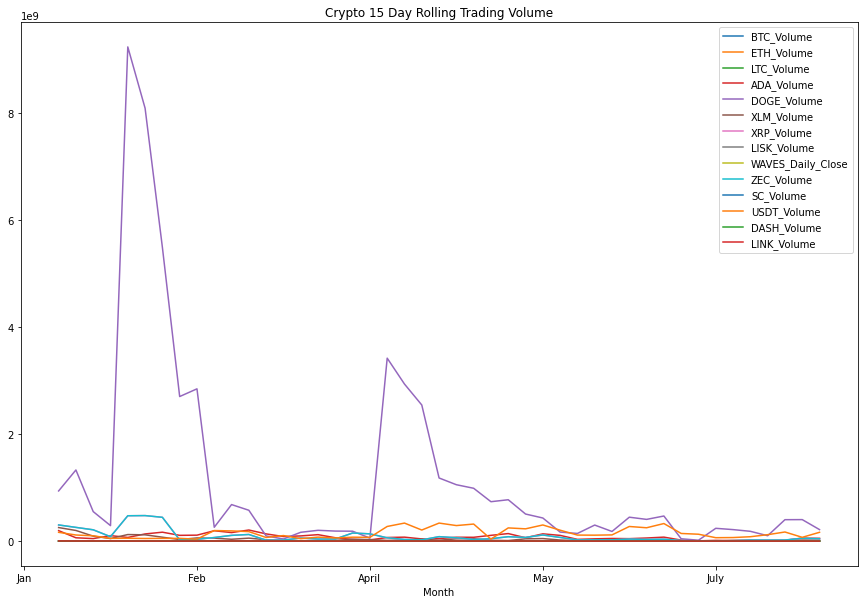

In [97]:
trade_2021_df.rolling(window=3).std().plot(figsize=(15, 10), title="Crypto 15 Day Rolling Trading Volume")

In [100]:
trade_2021_2_df = trade_2021_df.drop(columns=['DOGE_Volume'])

<AxesSubplot:title={'center':'Crypto 15 Day Rolling Trading Volume, EXCL. DOGE'}, xlabel='Month'>

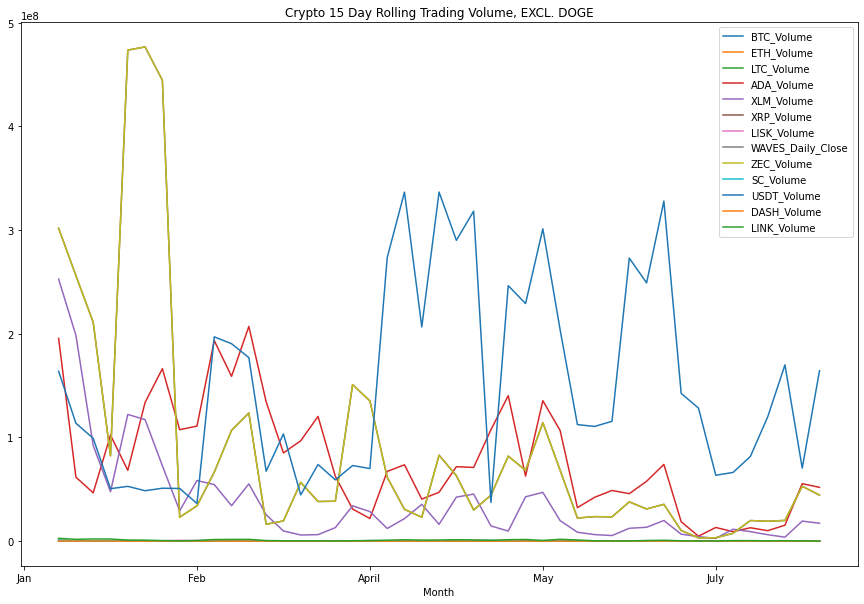

In [101]:
trade_2021_2_df.rolling(window=3).std().plot(figsize=(15, 10), title="Crypto 15 Day Rolling Trading Volume, EXCL. DOGE")

<AxesSubplot:title={'center':'Crypto 30 Day Rolling, Daily Closing Price'}, xlabel='Month'>

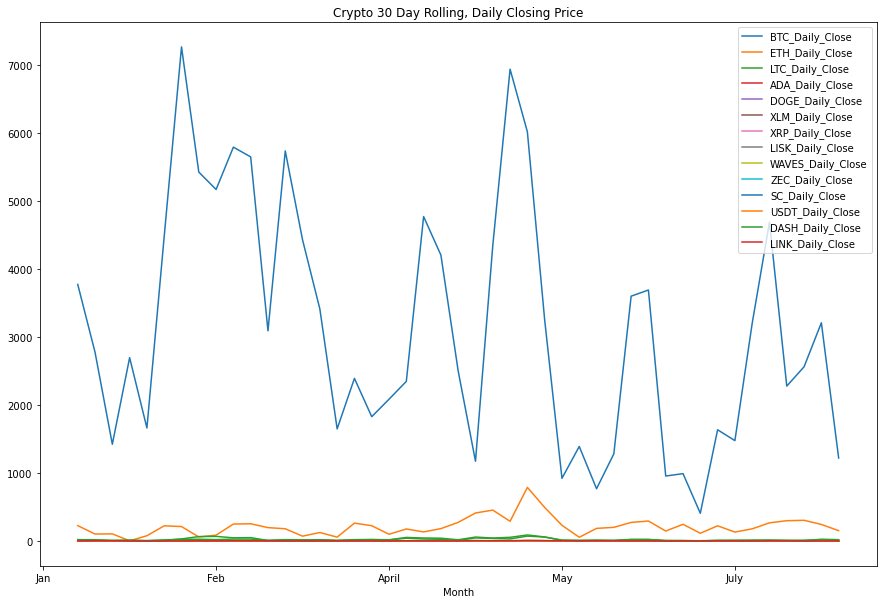

In [75]:
# Rolling Closing Price, 15 day(window=3, since data is 5 days apart) rolling period
final_2021_df.rolling(window=3).std().plot(figsize=(15, 10), title="Crypto 30 Day Rolling, Daily Closing Price")

In [76]:
final_2021_2_df = final_2021_df.drop(columns=['BTC_Daily_Close'])

<AxesSubplot:title={'center':'Crypto 30 Day Rolling, Daily Closing Price'}, xlabel='Month'>

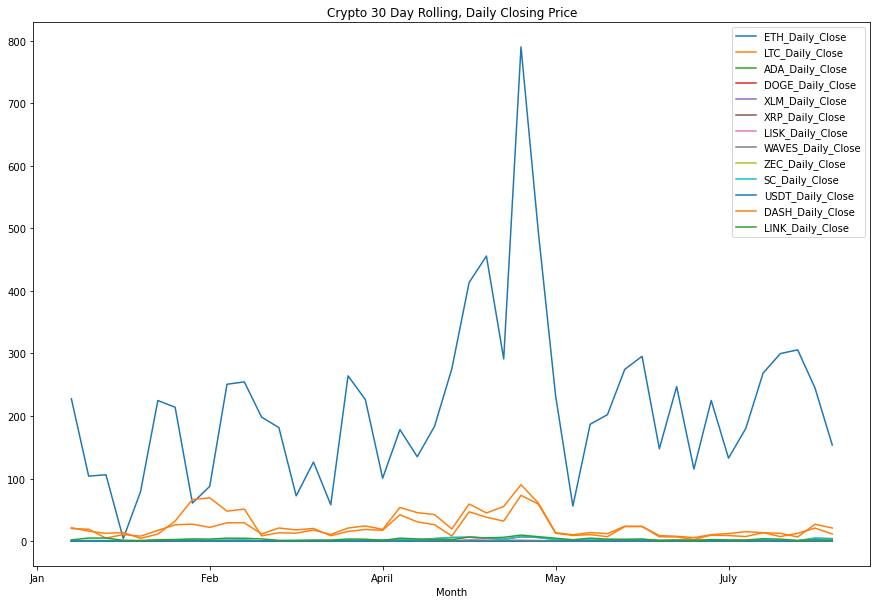

In [77]:
# Rolling Closing Price, 15 day(window=3, since data is 5 days apart) rolling period. Excluding Bitcoin.
final_2021_2_df.rolling(window=3).std().plot(figsize=(15, 10), title="Crypto 30 Day Rolling, Daily Closing Price")

In [78]:
final_2021_3_df = final_2021_df.drop(columns=['BTC_Daily_Close', 'ETH_Daily_Close'])

<AxesSubplot:title={'center':'Crypto 30 Day Rolling, Daily Closing Price'}, xlabel='Month'>

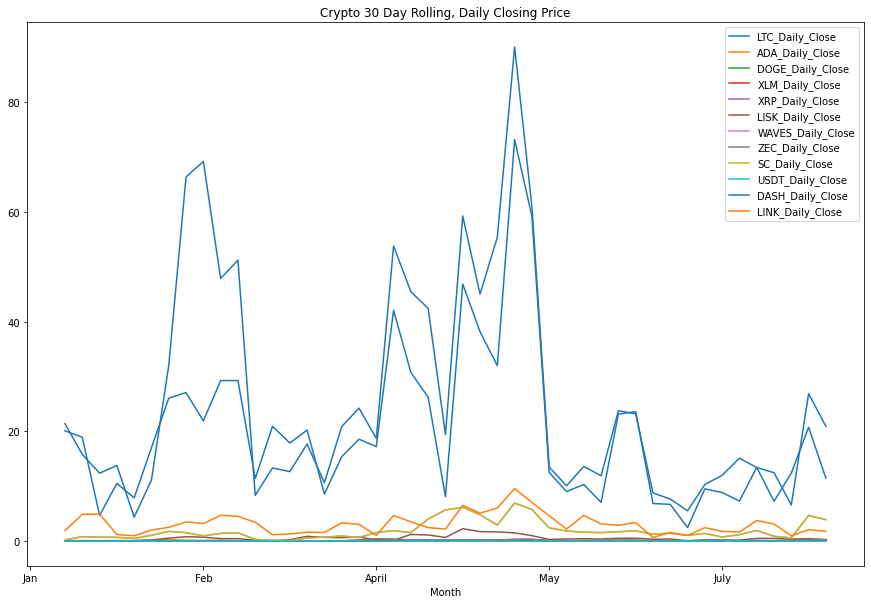

In [79]:
# Rolling plot of Closing Price, 15 day(window=3, since data is 5 days apart) rolling period. Excluding Bitcoin and Ethereum.
final_2021_3_df.rolling(window=3).std().plot(figsize=(15, 10), title="Crypto 30 Day Rolling, Daily Closing Price")